In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Displaying basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [3]:
# 1. Future Content Trend Analysis (Regression)
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
trend_data = df['year_added'].value_counts().sort_index().reset_index()
trend_data.columns = ['year', 'count']

In [4]:
#Prepare data for regression
X = trend_data[['year']]
y = trend_data['count']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict future trends
future_years = pd.DataFrame({'year': range(2025, 2031)})
future_predictions = model.predict(future_years)

In [8]:
# Combine predictions with future years
future_trend = pd.DataFrame({'year': future_years['year'], 'predicted_count': future_predictions})

print("Future Trend Predictions:")
print(future_trend)

Future Trend Predictions:
   year  predicted_count
0  2025      2269.512027
1  2026      2436.931271
2  2027      2604.350515
3  2028      2771.769759
4  2029      2939.189003
5  2030      3106.608247


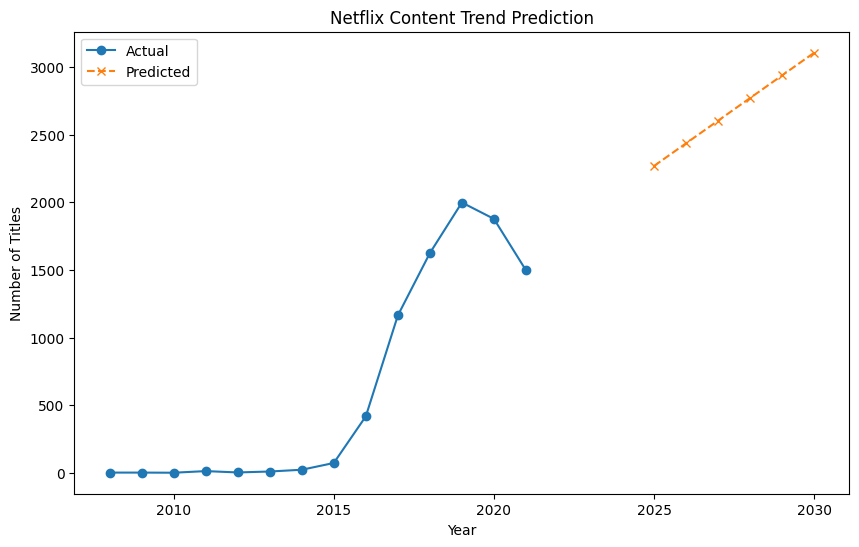

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trend_data['year'], trend_data['count'], marker='o', label='Actual')
plt.plot(future_trend['year'], future_trend['predicted_count'], marker='x', linestyle='--', label='Predicted')
plt.title('Netflix Content Trend Prediction')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

In [10]:
# 2. Clustering Analysis
# Prepare clustering data
clustering_data = df[['release_year', 'rating']].dropna()
clustering_data['rating_encoded'] = clustering_data['rating'].astype('category').cat.codes

In [11]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data[['release_year', 'rating_encoded']])


In [12]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
clustering_data['cluster'] = clusters

In [13]:
# Calculate silhouette score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5321289199856779


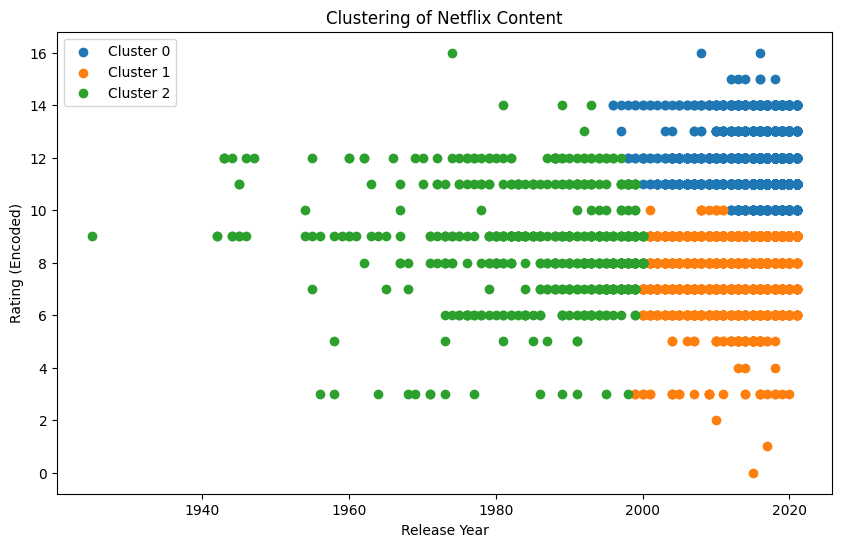

In [14]:
# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = clustering_data[clustering_data['cluster'] == cluster]
    plt.scatter(cluster_data['release_year'], cluster_data['rating_encoded'], label=f'Cluster {cluster}')
plt.title('Clustering of Netflix Content')
plt.xlabel('Release Year')
plt.ylabel('Rating (Encoded)')
plt.legend()
plt.show()

In [15]:
# 3. Content Popularity Prediction
# Define popular genres
genres = df['listed_in'].str.split(',').explode().str.strip().value_counts()  # Add this if not already defined
popular_genres = genres[genres > genres.mean()].index

In [16]:
# Add a column indicating whether a title belongs to a popular genre
df['is_popular_genre'] = df['listed_in'].apply(lambda x: 1 if any(genre in x for genre in popular_genres) else 0)

# Prepare data for classification
df['rating_encoded'] = df['rating'].astype('category').cat.codes
X = df[['release_year', 'rating_encoded']].dropna()
y = df['is_popular_genre']

In [17]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Classification Model Accuracy: {accuracy:.2f}")

Classification Model Accuracy: 0.87


In [19]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Show predictions
predictions = pd.DataFrame({
    'release_year': X_test['release_year'],
    'rating_encoded': X_test['rating_encoded'],
    'actual': y_test,
    'predicted': y_pred
})

# Display a sample of predictions
print("Sample Predictions:")
print(predictions.head(10))

Sample Predictions:
      release_year  rating_encoded  actual  predicted
4970          2018              11       1          1
3362          2019              11       0          1
5494          2017              13       0          1
1688          2020              11       0          1
1349          2012              11       1          1
4862          2009              11       1          1
2676          2020              11       1          1
487           2021              11       1          1
1671          2020              12       1          1
5028          2018              11       1          1
